<a href="https://colab.research.google.com/github/marleriee/Teaching-Machine-Learning/blob/main/Lab1_Task6_3Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Python: It's easier than it sounds.**

***During the last tasks, you have learned what a decision tree is and how to create one by hand. But let's imagine, we take our case example a bit further:***

You are a running coach working within a large coaching network that oversees 100,000 competitive female distance runners worldwide. To better support athlete health and performance, coaches across the network systematically collect both self-reported and observed data into a centralized database.

The following indicators are tracked for each runner:

* Training load: Whether the athlete consistently runs >10 hours per week (Yes/No).

* Fatigue: Self-reported tiredness or insufficient recovery (Yes/No).

* Menstrual disturbance: Irregular or absent periods, often linked to low energy availability (Yes/No).

* Outcome: Overuse fractures (e.g., stress fractures) diagnosed during the season (Yes/No).



This dataset — representing a vast population of endurance athletes — allows for large-scale analysis of health risks associated with training load, recovery, and menstrual health. Unlike small case studies, the size of the database enables exploration of nuanced patterns and subgroups that may not be visible in smaller samples

## And most importantly, we cannot do this by hand. We would like to use programming and machine learning to find individuals at high risk of overuse fractures.

_________________________

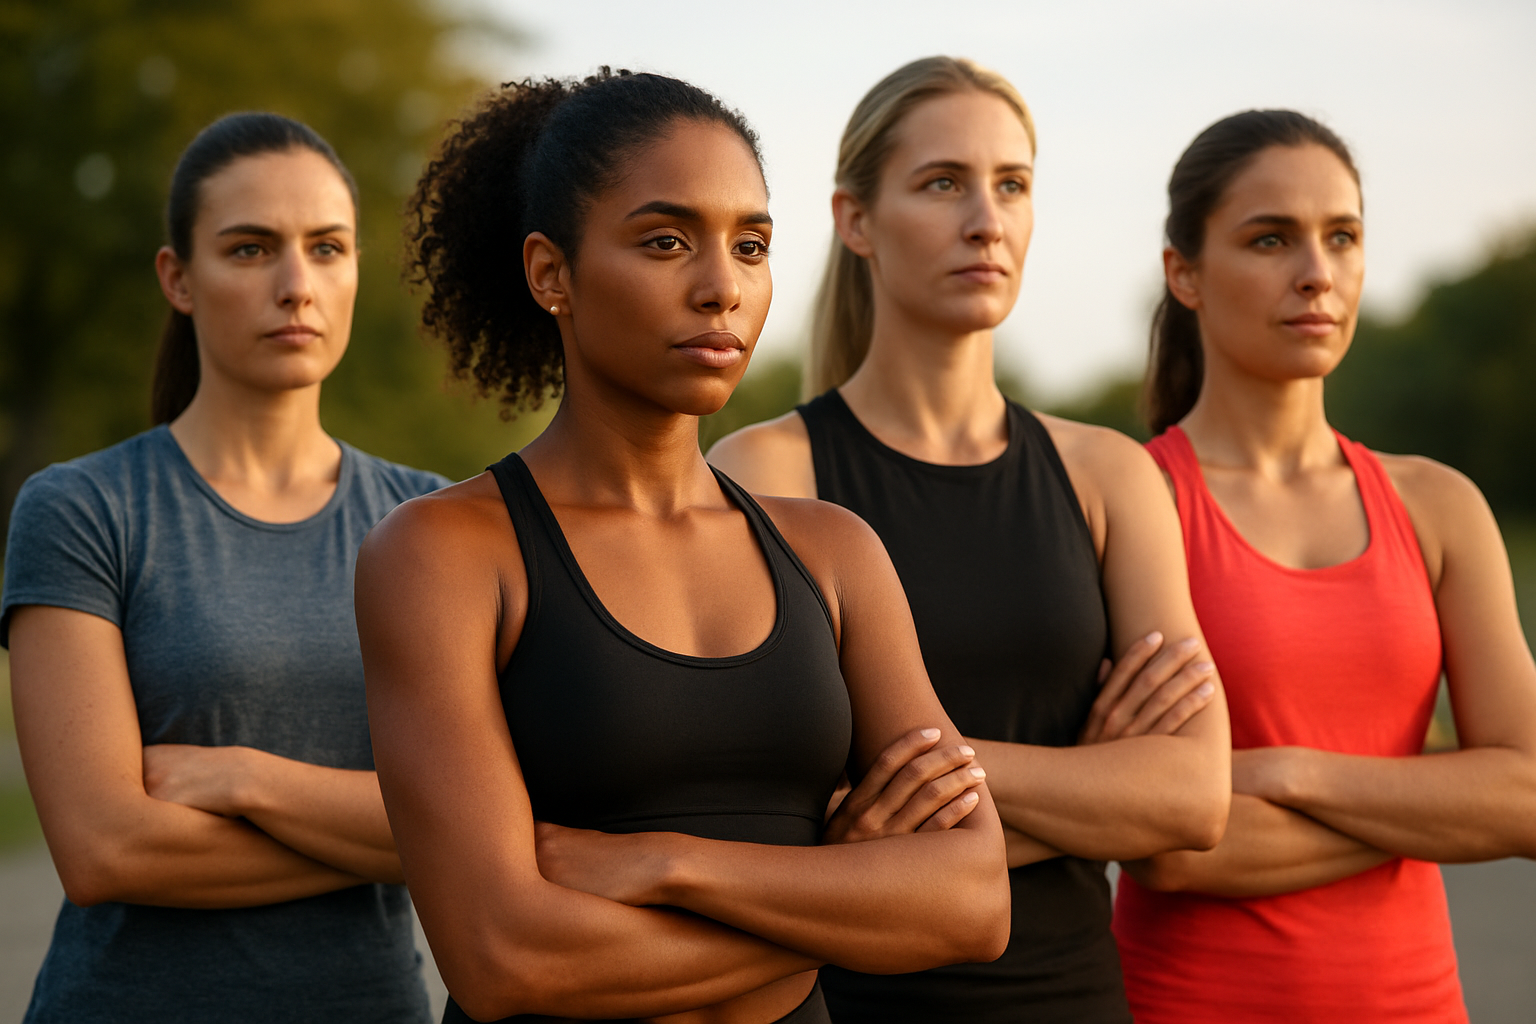



# **Getting Started with Google Colab**

In this course, you’ll use Google Colab, a free online environment where we can run Python code directly in the browser. You don’t need to install anything on your own computer, and you don’t need any prior coding experience.

The key idea:

* You can run the code cells as they are, without writing code yourself.

* You can ask ChatGPT or Gemini (integrated into Google Colab, next to your profile picture in the upper right) to explain what each piece of code does, step by step, in plain language.

* Think of Colab as a “lab notebook” where you press play, look at results, and then reflect on what they mean.

Your job is not to become a programmer here—it’s to learn how we can use data and simple machine learning tools to answer questions about athlete health and performance. Large language models will be your guide to translate the code into concepts you understand and can use.

________________________

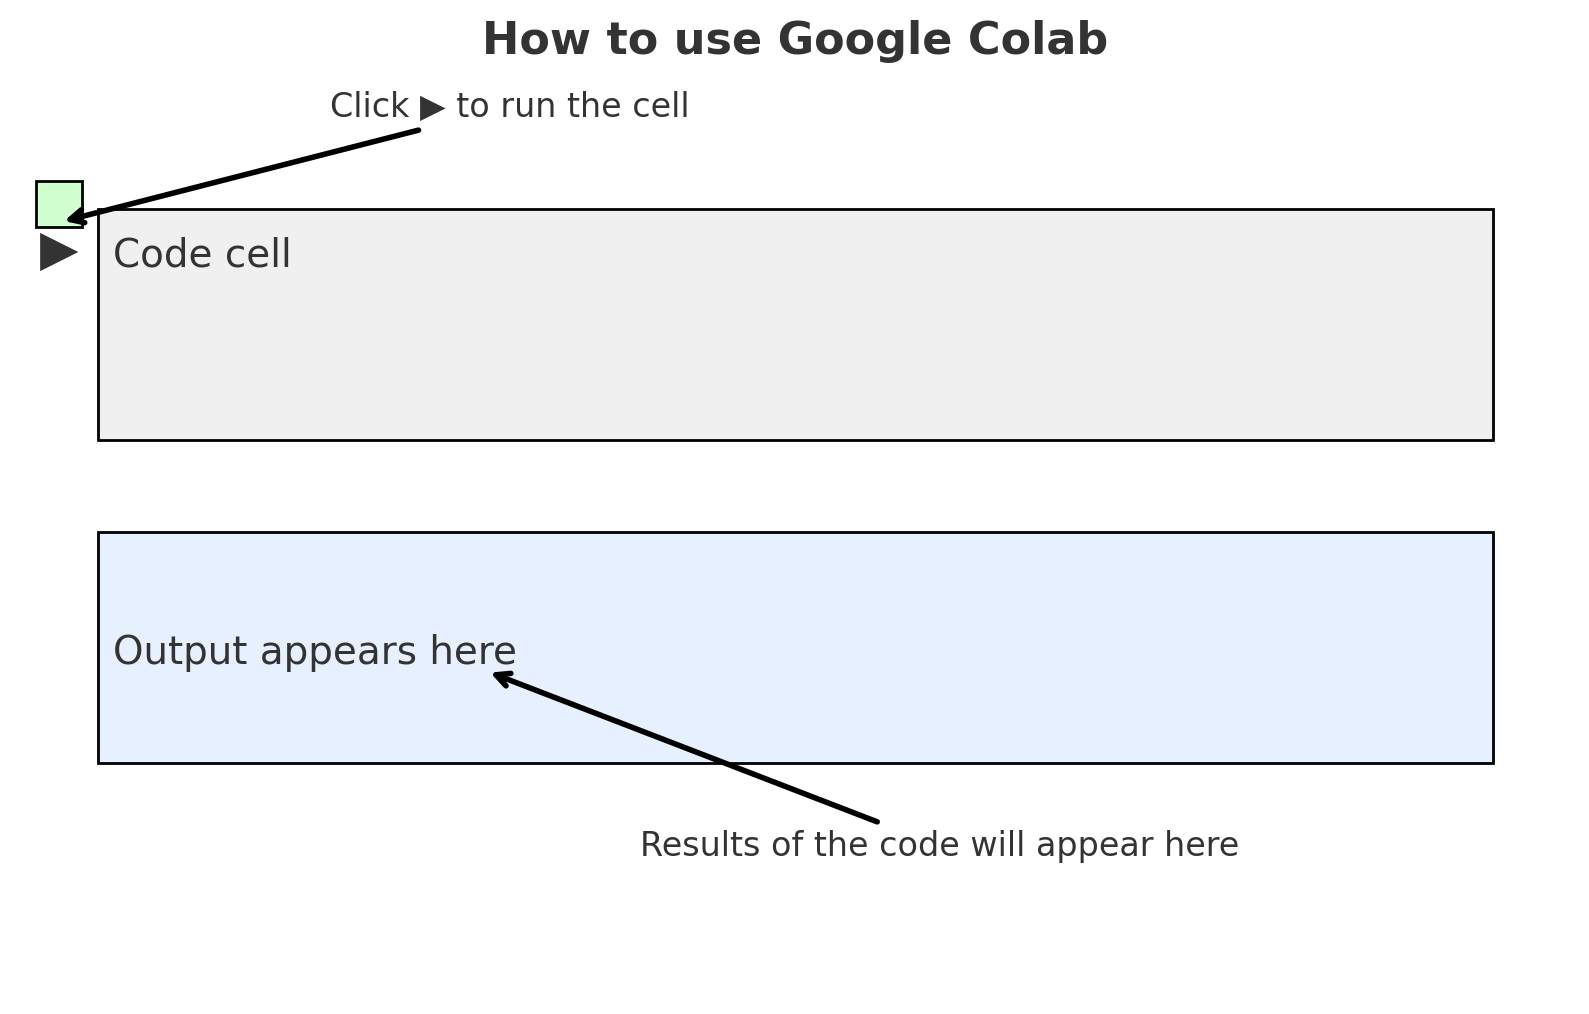


In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 2: Load the dataset
# Replace 'runners_data.csv' with your actual dataset file
url = "https://raw.githubusercontent.com/marleriee/Teaching-Machine-Learning/main/runners_data_byhand_tree_realistic.csv"
data = pd.read_csv(url)

# We can check that the dataset looks similar to the one we used by hand, just including 100,000 runners this time.
print(data.head(3)) # this command shows us the first three rows of the dataset


  Running>10h Fatigue MenstrualDisturbance OveruseFracture
0         Yes      No                  Yes              No
1         Yes     Yes                   No              No
2         Yes     Yes                   No              No


In [ ]:
# Step 3: Encode categorical variables (Yes=1, No=0)
# Encode Yes/No to 1/0 safely (no warnings)
data_encoded = data.copy()
for col in ['Running>10h', 'Fatigue', 'MenstrualDisturbance', 'OveruseFracture']:
    data_encoded[col] = data_encoded[col].map({'Yes': 1, 'No': 0})

In [ ]:
# Step 4: Split dataset into features and target
X = data_encoded[['Running>10h','Fatigue','MenstrualDisturbance']]
y = data_encoded['OveruseFracture']

# Step 5: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # depth=2 to mimic manual splits
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

**Task 6.1: What does depth=2 mean here?**


Answer:

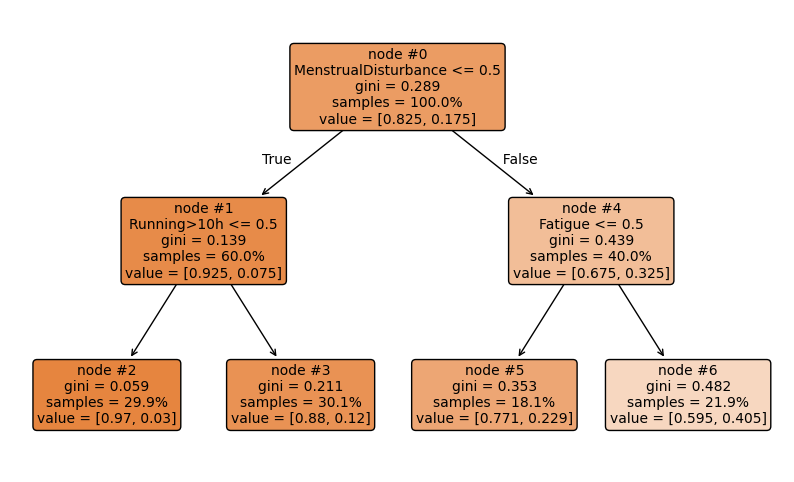

In [ ]:
# Step 6: Visualize the tree
# Plot with class names and feature names

feature_names = list(X.columns)

plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    fontsize=10
)
plt.show()


In [ ]:
# Step 7 (optional): Print probabilities for each leaf
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
value = clf.tree_.value

print("\nLeaf node probabilities (Overuse Fracture):")
for i in range(n_nodes):
    if children_left[i] == children_right[i]:  # it's a leaf
        total = value[i].sum()
        prob = value[i][0][1]/total  # probability of fracture
        print(f"Leaf {i}: Probability of fracture = {prob:.2f}")



Leaf node probabilities (Overuse Fracture):
Leaf 2: Probability of fracture = 0.03
Leaf 3: Probability of fracture = 0.12
Leaf 5: Probability of fracture = 0.23
Leaf 6: Probability of fracture = 0.40


**Task 6.2: How does this decision tree compare to the one you drew?**


Answer:

In [ ]:
# Step 8: Cross-tabulation of fracture outcomes across the 3 features

crosstab_counts = pd.crosstab(
    index=[data['MenstrualDisturbance'], data['Fatigue'], data['Running>10h']],
    columns=data['OveruseFracture']
)

print("\nCounts of fractures by subgroup:")
print(crosstab_counts)



Counts of fractures by subgroup:
OveruseFracture                              No   Yes
MenstrualDisturbance Fatigue Running>10h             
No                   No      No           13192   405
                             Yes          11922  1602
                     Yes     No           15831   499
                             Yes          14559  2005
Yes                  No      No            6965  2094
                             Yes           6990  2052
                     Yes     No            6574  4542
                             Yes           6447  4321
